**Exercise 1: MLE of a Gaussian p_model(50 points)**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import warnings
import math

In [ ]:
#partial derivative w.r.t to mean x-mu/sigma_2
def partial_deriv_mean(data, est_mean, est_var):
  warnings.filterwarnings("ignore")
  return (np.sum(data - est_mean))/est_var**2
  

In [ ]:
#partial derivative w.r.t to variance
def partial_deriv_var(data, est_mean, est_var,N):
  warnings.filterwarnings("ignore")
  return (((np.sum((data - est_mean)**2))/est_var**2)-N)/2*(est_var**2);
  

In [ ]:
def gradient_descent(data, est_mean, est_var, learning_rate, epochs):
  #prev_w = np.array([est_mean, est_var])
  for k in range(epochs):
    for x in data:
      d_mean = partial_deriv_mean(x, est_mean, est_var)
      d_var = partial_deriv_var(x, est_mean, est_var,len(data))
  
      est_mean = est_mean - (learning_rate*(-d_mean))
      est_var = est_var - (learning_rate*(-d_var))

  print("MLE for mean gaussian parameters - %.2f, variance - %.2f" % (est_mean,est_var)) 

In [ ]:
data = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]
gradient_descent(data,0,1,0.01,100000)

MLE for mean gaussian parameters - 6.22, variance - 2.43


To estimate the optimal values of gaussian distribution used stochastic gradient descent algorithm.
1. started with initial values for mean and variance as 0 , 1, learning rate 0.01
2. computed the partial derivates of mean and variance starting with random values of mean and variance
3. Plug and chug the derivate values to calculate the gradient
4. Estimated mean and varianance is derived from the formula est val = est val - loss fn ; where loss fn = learning rate * (partial derivate of mean/variance)
5. Repeated the process until we get very small value for loss function. The value of est_mean and est_var at the end of the iterations are optimal values for gaussian distribution

For our data, MLE for gaussian parameters mean - 6.22, variance - 2.43

**Exercise 2: MLE of a Gaussian p_model for a regression problem (50 points)**

In [ ]:
def linear_gradient_descent(x,y,learning_rate,epochs):  
  plt.scatter(x, y) #plot the data
  m_curr = 0
  c_curr = 0
  n = float(len(x))
  
  for i in range(epochs):
    y_pred = m_curr * x + c_curr    #linear equation y = mx+c
    #at each step calculating the predicted values of y
    md = (-2/n) *sum(x*(y-y_pred)) #partial derivative of m
    cd = (-2/n) *sum(y-y_pred) #partial derivative of m
    m_curr = m_curr - (learning_rate * md)
    c_curr = c_curr - (learning_rate * cd)
    
  plt.plot(x,y_pred)    #plot the model that fits the data closely
  
  print ("MLE for linear regression m  -> {}, c -> {}".format(m_curr,c_curr))
  
  

MLE for linear regression m  -> 0.9720324681885764, c -> -0.0915723644677935


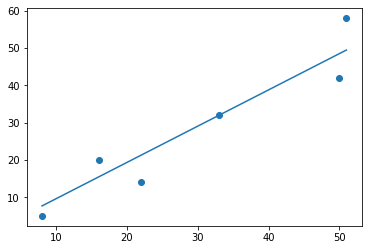

In [ ]:
x = np.array([8, 16, 22, 33, 50, 51])
y = np.array([5, 20, 14, 32, 42, 58])

linear_gradient_descent(x,y,0.0001,1000)


Linear equation => y = mx+c
Applying gradient descent algorithm to determine the optimal value for m and c.
1. Initially let m = 0 and c = 0 and learning rate as 0.0001. This controls how much the value of m changes with each step
2. Calculated the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value D.
3. Similarly found the partial derivative with respect to c
4. Updated current value of m and c using the formula:
m_curr = m_curr - (learning_rate * derivative of m)
c_curr = c_curr - (learning_rate * derivative of c)
5. Repeated the process until we got very small value for loss function. The value of m and c at the end of the iterations are optimal values
In our example, it is m  -> 0.9720324681885764, c -> -0.0915723644677935